# EXPLORATORY DATA ANALYSIS

In [ ]:
# SQL Queries (Used Google BigQuery)

-- Creating the 'imdb_movies' table

CREATE TABLE imdb_top_1000 (
    Poster_Link TEXT,
    Series_Title TEXT,
    Released_Year VARCHAR(10),
    Certificate VARCHAR(10),
    Runtime VARCHAR(10),
    Genre TEXT,
    IMDB_Rating FLOAT,
    Overview TEXT,
    Meta_score FLOAT,
    Director TEXT,
    Star1 TEXT,
    Star2 TEXT,
    Star3 TEXT,
    Star4 TEXT,
    No_of_Votes INT,
    Gross TEXT
);

SELECT * FROM `my-data-project-1-401909.imdb_movies.movies` 

-- 1. How has the average IMDb rating of top movies changed over the years?
SELECT 
  released_year,
  AVG(imdb_rating) as avg_rating
FROM `my-data-project-1-401909.imdb_movies.movies` 
GROUP BY released_year
ORDER BY released_year

-- 2. Are longer movies more popular now than they were in the past?
SELECT 
  released_year,
  AVG(runtime) as avg_runtime,
  AVG(imdb_rating) as avg_rating
FROM `my-data-project-1-401909.imdb_movies.movies` 
GROUP BY released_year
ORDER BY released_year

-- 3. What are the changes in genre popularity over the years? 
-- This query will provide insights into how the popularity of 
-- different movie genres has evolved over the years, 
-- based on the number of movies released, their average ratings, 
-- and the total number of votes they received.
SELECT
  released_year,
  genre,
  COUNT(*) AS number_of_movies,
  AVG(imdb_rating) AS average_rating,
  SUM(no_of_votes) AS total_votes
FROM `my-data-project-1-401909.imdb_movies.movies` 
GROUP BY released_year, genre
ORDER BY released_year, genre

-- 4. What genre generates the most revenue?
SELECT
  genre,
  SUM(gross) AS total_revenue
FROM `my-data-project-1-401909.imdb_movies.movies` 
GROUP BY genre
ORDER BY total_revenue DESC

-- 5. Average ratings and box office success of movies by directors
SELECT 
    director,
    AVG(imdb_rating) AS average_rating,
    AVG(gross) AS average_gross
FROM `my-data-project-1-401909.imdb_movies.movies`
GROUP BY director
ORDER BY average_rating DESC, average_gross DESC

-- 6. Average ratings and box office success of movies by actors
SELECT 
    star1,
    star2,
    AVG(imdb_rating) AS average_rating,
    AVG(gross) AS average_gross
FROM `my-data-project-1-401909.imdb_movies.movies`
GROUP BY star1, star2
ORDER BY average_rating DESC, average_gross DESC

-- 7. Genres based on their average IMDb ratings and the number of votes
SELECT 
    genre, 
    AVG(imdb_rating) AS average_rating,
    SUM(no_of_votes) AS total_votes
FROM `my-data-project-1-401909.imdb_movies.movies`
GROUP BY genre
ORDER BY average_rating DESC, total_votes DESC;


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('../1_data/imdb_top_1000_clean.csv')

In [5]:
df.head(1)

,series_title,released_year,certificate,runtime,genre,imdb_rating,meta_score,director,star1,star2,star3,star4,no_of_votes,gross
0,Sleuth,1972.0,PG,138,"Mystery, Thriller",8.0,NaN,Joseph L. Mankiewicz,Laurence Olivier,Michael Caine,Alec Cawthorne,John Matthews,44748,4081254.0


In [6]:
df.shape

(1000, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   series_title   1000 non-null   object 
 1   released_year  999 non-null    float64
 2   certificate    899 non-null    object 
 3   runtime        1000 non-null   int64  
 4   genre          1000 non-null   object 
 5   imdb_rating    1000 non-null   float64
 6   meta_score     843 non-null    float64
 7   director       1000 non-null   object 
 8   star1          1000 non-null   object 
 9   star2          1000 non-null   object 
 10  star3          1000 non-null   object 
 11  star4          1000 non-null   object 
 12  no_of_votes    1000 non-null   int64  
 13  gross          831 non-null    float64
dtypes: float64(4), int64(2), object(8)
memory usage: 109.5+ KB


In [59]:
df.head(1)

,series_title,released_year,certificate,runtime,genre,imdb_rating,meta_score,director,star1,star2,star3,star4,no_of_votes,gross
0,Sleuth,1972.0,PG,138,"Mystery, Thriller",8.0,NaN,Joseph L. Mankiewicz,Laurence Olivier,Michael Caine,Alec Cawthorne,John Matthews,44748,4081254.0


## 1. Gross Revenues of IMDb's Highest Rated 1000 Movies

<Axes: xlabel='released_year', ylabel='gross'>

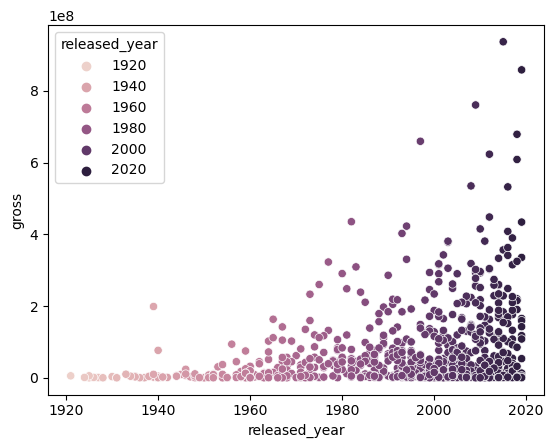

In [106]:
sns.scatterplot(x='released_year', y='gross', data=df, hue='released_year')

/var/folders/r9/xv1vjygj609_knwb8fj_mvl80000gn/T/ipykernel_7976/977595725.py:14: UserWarning: The palette list has more values (11) than needed (10), which may not be intended.
  scatter = sns.scatterplot(x='released_year', y='gross', data=df, hue='decade_interval', palette=palette,


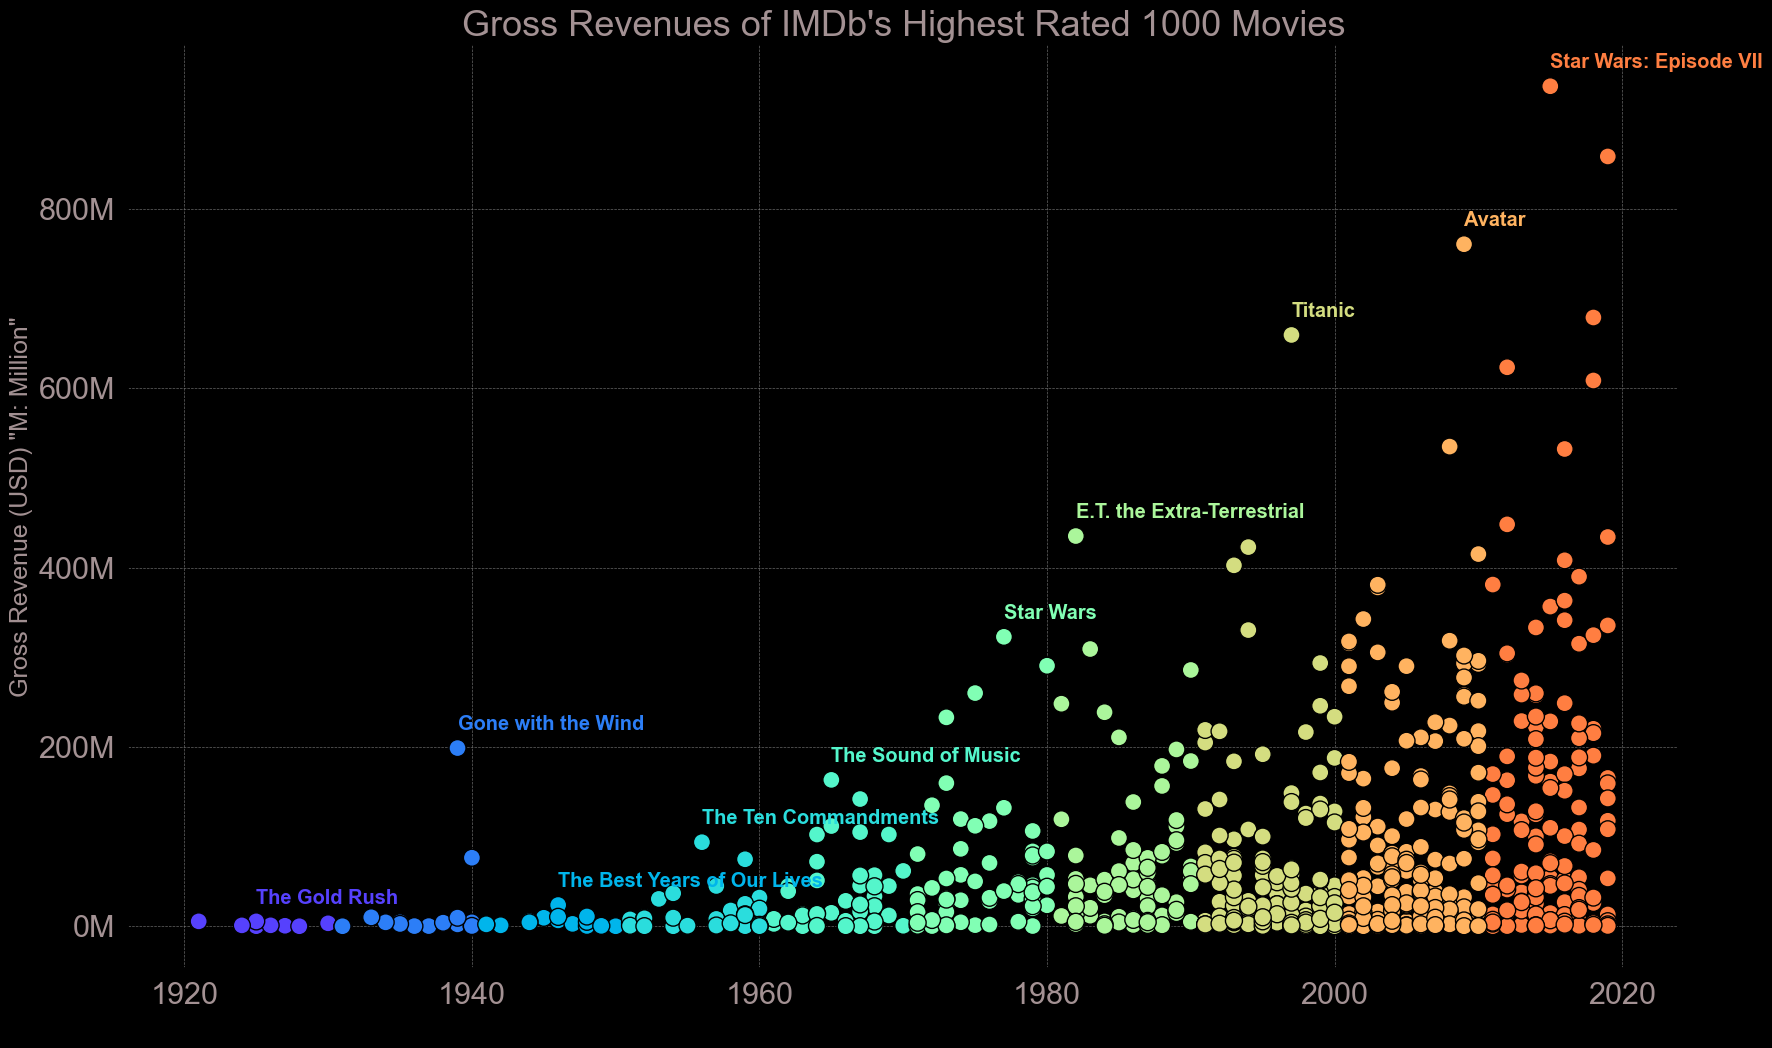

In [147]:
import matplotlib.ticker as ticker

sns.set(style="dark") 
plt.style.use("dark_background")
# Creating a new column for 10-year intervals
df['decade_interval'] = pd.cut(df['released_year'], bins=range(int(df['released_year'].min()), int(df['released_year'].max()) + 10, 10))

# Identifying the highest grossing movie in each interval
highest_grossing_per_interval = df.loc[df.groupby('decade_interval')['gross'].idxmax()]

palette = sns.color_palette('rainbow', n_colors=len(df['decade_interval'].unique()))

plt.figure(figsize=(20, 12))
scatter = sns.scatterplot(x='released_year', y='gross', data=df, hue='decade_interval', palette=palette, 
                          edgecolor='black', s=150, alpha=1)

# Adding faint gridlines
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.8)

# Formatting the y-axis to display millions without decimals
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1_000_000:g}M'))

# Changing the color of the plot's outer borderlines to black
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_edgecolor('black')

# Defining an offset for positioning the movie titles
offset = 20_000_000  # Example offset; adjust based on your dataset's scale

# Annotating with the names of the highest grossing movies in the corresponding color
for _, row in highest_grossing_per_interval.iterrows():
    interval_index = list(df['decade_interval'].cat.categories).index(row['decade_interval'])
    plt.text(row['released_year'], row['gross'] + offset, row['series_title'], horizontalalignment='left', 
             size='large', color=palette[interval_index], weight='semibold')

plt.title("Gross Revenues of IMDb's Highest Rated 1000 Movies", fontsize=26, color='#a39193')
plt.xlabel(' ', fontsize=18)
plt.ylabel('Gross Revenue (USD) "M: Million"', fontsize=18,  color='#a39193')
plt.xticks(fontsize=22,  color='#a39193')
plt.yticks(fontsize=22,  color='#a39193')
plt.legend().set_visible(False) 

#plt.savefig('../4_graphs/1_revenue_by_year.png')

plt.show()


In [11]:
inflation = pd.read_csv('../1_data/imdb_top_1000_clean_inflation2.csv')

## 1.1. Gross Revenues of IMDb's Highest Rated 1000 Movies
##         (Inflation Adjusted)

/var/folders/r9/xv1vjygj609_knwb8fj_mvl80000gn/T/ipykernel_7976/3416802889.py:15: UserWarning: The palette list has more values (11) than needed (10), which may not be intended.
  scatter = sns.scatterplot(x='released_year', y='inflation_adjusted_revenue', data=inflation, hue='decade_interval', palette=palette,


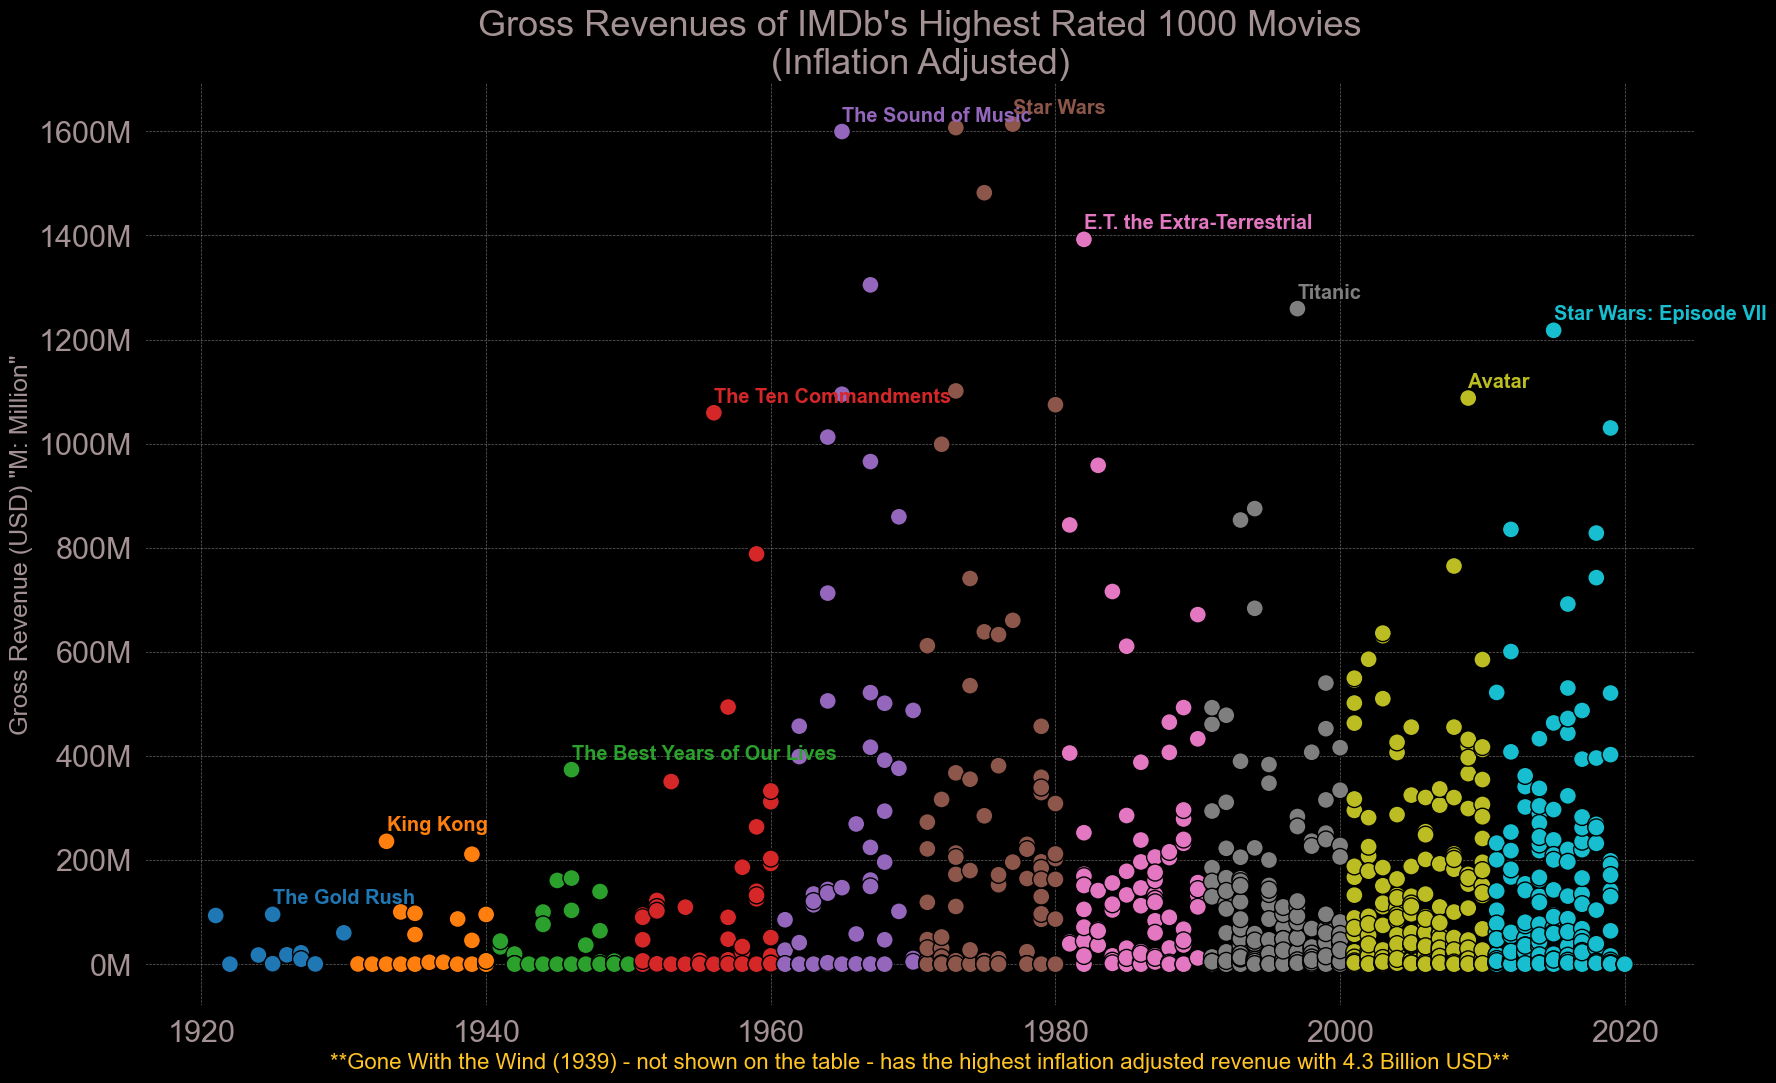

In [146]:
import matplotlib.ticker as ticker

sns.set(style="dark") 
plt.style.use("dark_background")

# Creating a new column for 10-year intervals
inflation['decade_interval'] = pd.cut(inflation['released_year'], bins=range(int(inflation['released_year'].min()), int(inflation['released_year'].max()) + 10, 10))

# Identifying the highest grossing movie in each interval
highest_grossing_per_interval = inflation.loc[inflation.groupby('decade_interval')['inflation_adjusted_revenue'].idxmax()]

palette = sns.color_palette('tab10', n_colors=len(inflation['decade_interval'].unique()))

plt.figure(figsize=(20, 12))
scatter = sns.scatterplot(x='released_year', y='inflation_adjusted_revenue', data=inflation, hue='decade_interval', palette=palette, 
                          edgecolor='black', s=150, alpha=1)

# Adding faint gridlines
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.8)

# Formatting the y-axis to display millions without decimals
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1_000_000:g}M'))

# Changing the color of the plot's outer borderlines to black
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_edgecolor('black')

# Defining an offset for positioning the movie titles
offset = 20_000_000  # Example offset; adjust based on your dataset's scale

# Annotating with the names of the highest grossing movies in the corresponding color
for _, row in highest_grossing_per_interval.iterrows():
    interval_index = list(inflation['decade_interval'].cat.categories).index(row['decade_interval'])
    plt.text(row['released_year'], row['inflation_adjusted_revenue'] + offset, row['series_title'], horizontalalignment='left', 
             size='large', color=palette[interval_index], weight='semibold')

plt.title("""Gross Revenues of IMDb's Highest Rated 1000 Movies
(Inflation Adjusted)""", fontsize=26, color='#a39193')
plt.xlabel('**Gone With the Wind (1939) - not shown on the table - has the highest inflation adjusted revenue with 4.3 Billion USD**', fontsize=16, color='#ffc425')
plt.ylabel('Gross Revenue (USD) "M: Million"', fontsize=18,  color='#a39193')
plt.xticks(fontsize=22,  color='#a39193')
plt.yticks(fontsize=22,  color='#a39193')
plt.legend().set_visible(False) 

#plt.savefig('../4_graphs/1.1_revenue_by_year_inflation_adjusted.png')

plt.show()


In [120]:
inflation_gwtw = pd.read_csv('../1_data/imdb_top_1000_clean_inflation.csv')

/var/folders/r9/xv1vjygj609_knwb8fj_mvl80000gn/T/ipykernel_7976/1043851872.py:15: UserWarning: The palette list has more values (11) than needed (10), which may not be intended.
  scatter = sns.scatterplot(x='released_year', y='inflation_adjusted_revenue', data=inflation_gwtw, hue='decade_interval', palette=palette,


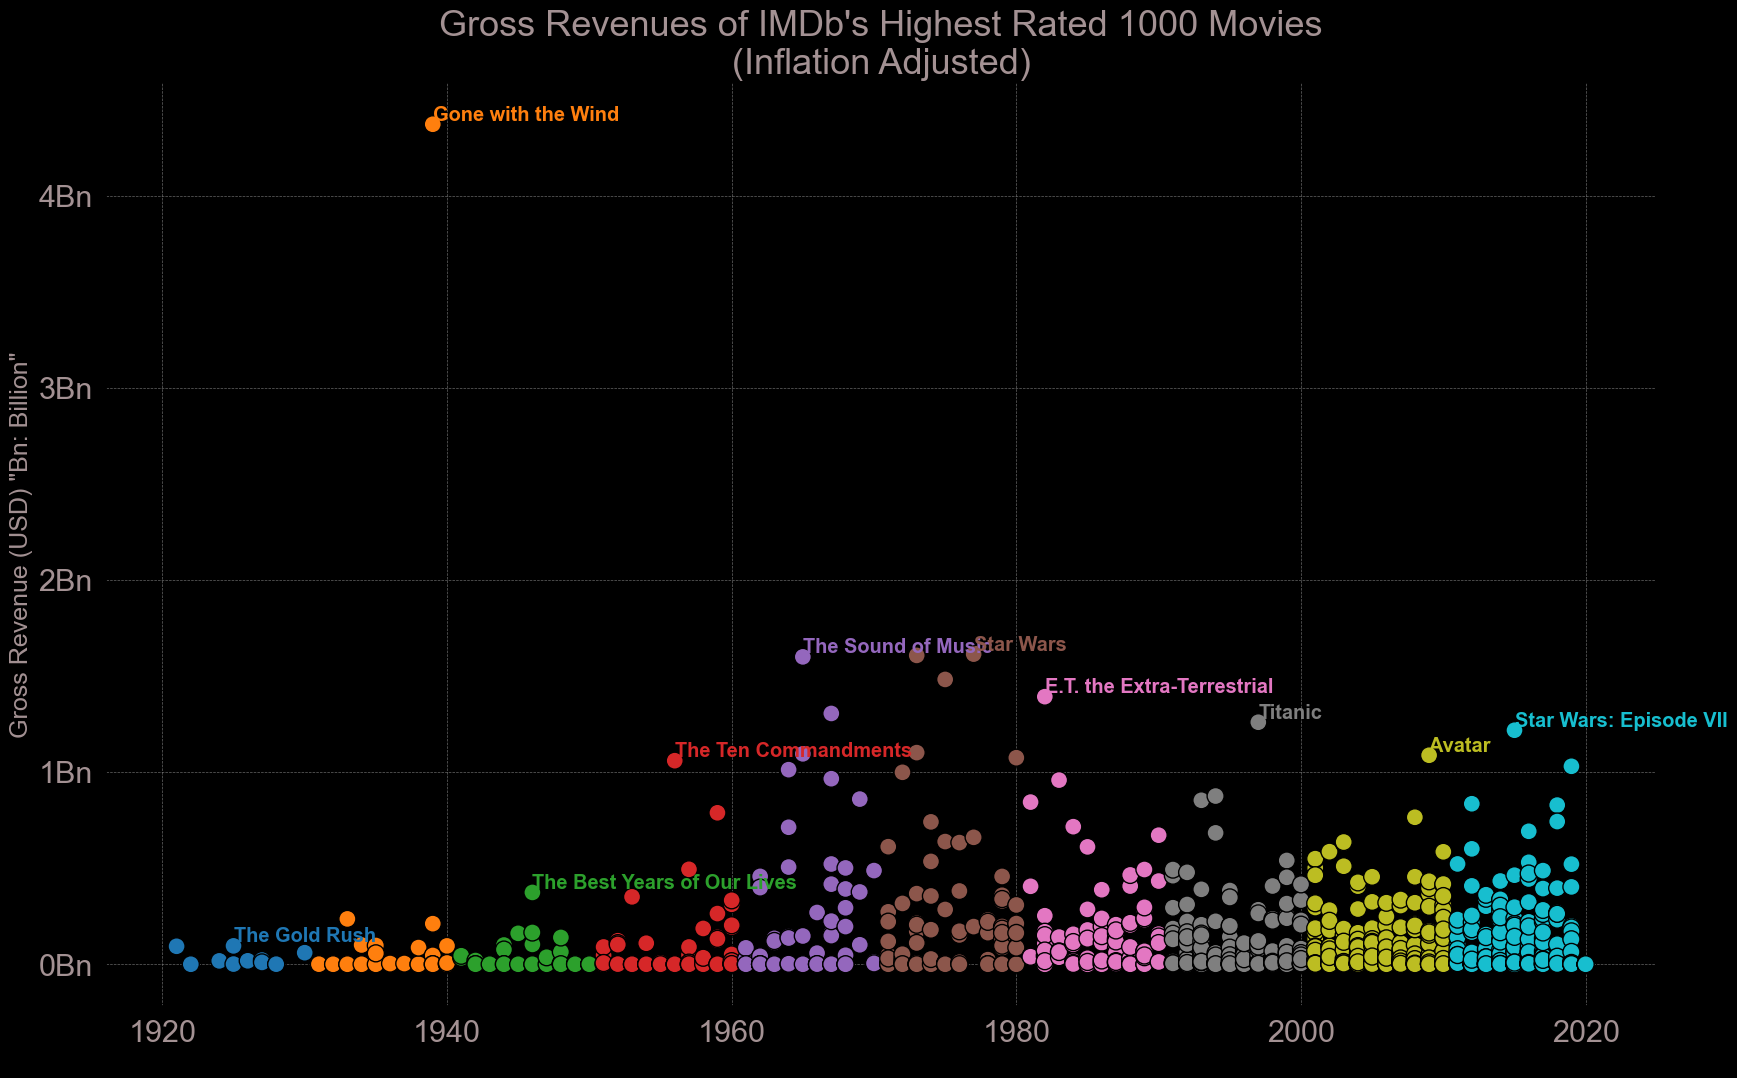

In [145]:
import matplotlib.ticker as ticker

sns.set(style="dark") 
plt.style.use("dark_background")

# Creating a new column for 10-year intervals
inflation_gwtw['decade_interval'] = pd.cut(inflation_gwtw['released_year'], bins=range(int(inflation_gwtw['released_year'].min()), int(inflation_gwtw['released_year'].max()) + 10, 10))

# Identifying the highest grossing movie in each interval
highest_grossing_per_interval = inflation_gwtw.loc[inflation_gwtw.groupby('decade_interval')['inflation_adjusted_revenue'].idxmax()]

palette = sns.color_palette('tab10', n_colors=len(inflation_gwtw['decade_interval'].unique()))

plt.figure(figsize=(20, 12))
scatter = sns.scatterplot(x='released_year', y='inflation_adjusted_revenue', data=inflation_gwtw, hue='decade_interval', palette=palette, 
                          edgecolor='black', s=150, alpha=1)

# Adding faint gridlines
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.8)

# Formatting the y-axis to display millions without decimals
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1_000_000_000:g}Bn'))

# Changing the color of the plot's outer borderlines to black
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_edgecolor('black')

# Defining an offset for positioning the movie titles
offset = 20_000_000  # Example offset; adjust based on your dataset's scale

# Annotating with the names of the highest grossing movies in the corresponding color
for _, row in highest_grossing_per_interval.iterrows():
    interval_index = list(inflation_gwtw['decade_interval'].cat.categories).index(row['decade_interval'])
    plt.text(row['released_year'], row['inflation_adjusted_revenue'] + offset, row['series_title'], horizontalalignment='left', 
             size='large', color=palette[interval_index], weight='semibold')

plt.title("""Gross Revenues of IMDb's Highest Rated 1000 Movies
(Inflation Adjusted)""", fontsize=26, color='#a39193')
plt.xlabel(' ')
plt.ylabel('Gross Revenue (USD) "Bn: Billion"', fontsize=18,  color='#a39193')
plt.xticks(fontsize=22,  color='#a39193')
plt.yticks(fontsize=22,  color='#a39193')
plt.legend().set_visible(False) 

#plt.savefig('../4_graphs/1.2_revenue_by_year_gonewiththewind.png')

plt.show()


## 2. Correlation between movie length and rating

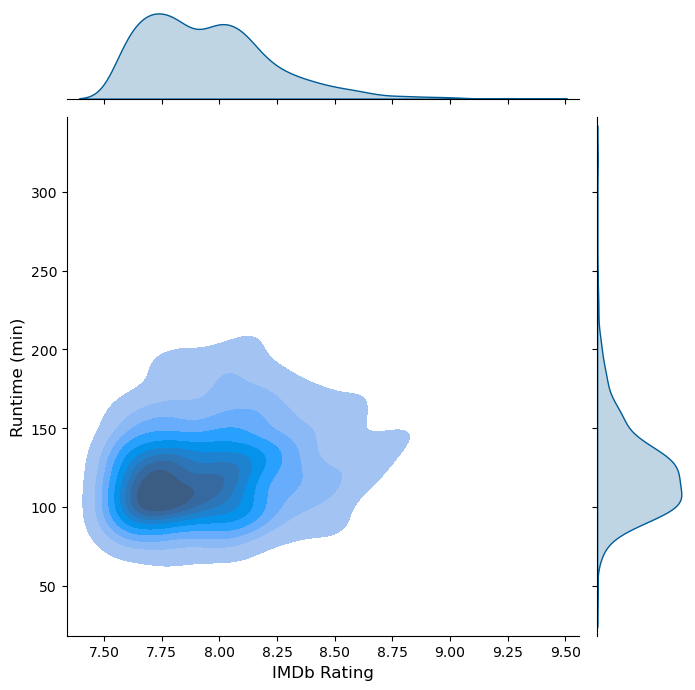

In [5]:

sns.jointplot(x='imdb_rating', y='runtime', data=df, fill=True, kind='kde', color='#005b96', height=7)

plt.ylabel('Runtime (min)', fontsize=12)
plt.xlabel('IMDb Rating', fontsize=12)

#plt.savefig('../4_graphs/2_corr_length_by_rating.png')
plt.show()

## 3. How has the average IMDb rating of top movies changed over the years?

In [3]:
rating_by_years = pd.read_csv('../3_exported_data/1.rating_by_year.csv')
rating_by_years

,released_year,avg_rating
0,NaN,7.600000
1,1920.0,8.100000
2,1921.0,8.300000
3,1922.0,7.900000
4,1924.0,8.200000
...,...,...
95,2016.0,7.935714
96,2017.0,7.890909
97,2018.0,7.994737
98,2019.0,7.995652


In [4]:
rating_by_years.dropna(inplace=True)

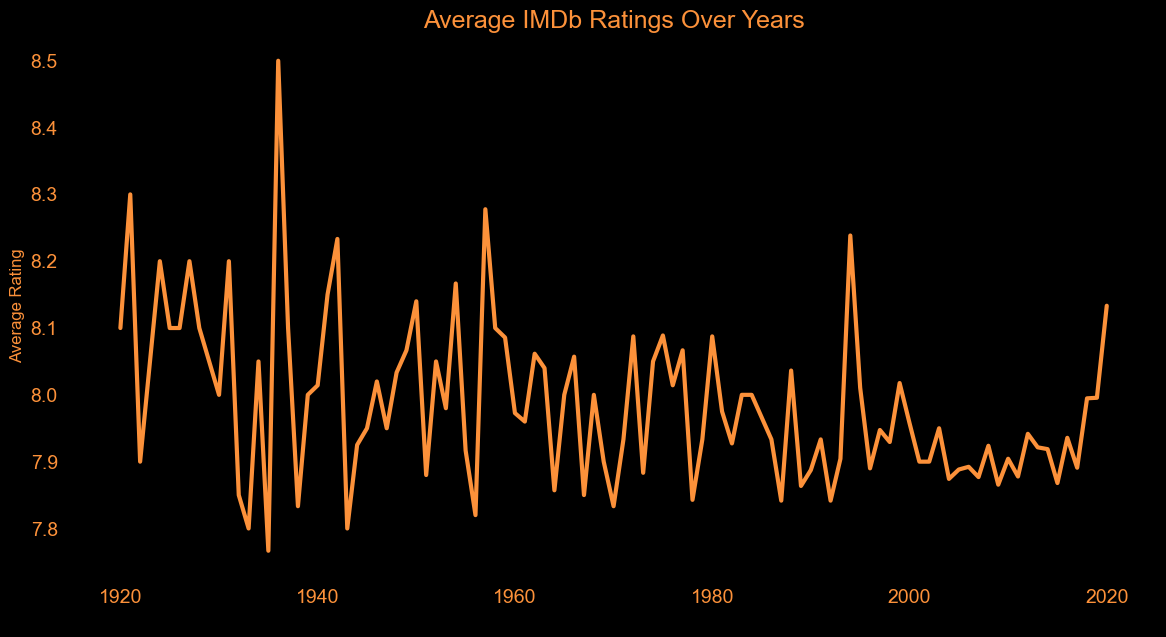

In [119]:
plt.figure(figsize=(14,7))

sns.set(style="dark") 
plt.style.use("dark_background")
sns.lineplot(x='released_year', y='avg_rating', data=rating_by_years, color='#fc913a', linewidth=3)

# Changing the color of the plot's outer borderlines to black
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    
plt.title('Average IMDb Ratings Over Years', fontsize=18, color='#fc913a')
plt.xlabel(' ')
plt.ylabel('Average Rating', fontsize=12, color='#fc913a')
plt.xticks(fontsize=14, color='#fc913a')
plt.yticks(fontsize=14, color='#fc913a')
plt.grid(False)

#plt.savefig('../4_graphs/3_avg_rating_by_year.png')
plt.show()

## 4. Are longer movies more popular now than they were in the past?

In [34]:
length_by_years = pd.read_csv('../3_exported_data/2.movie_length_by_year.csv')

In [36]:
length_by_years.dropna(inplace=True)

In [37]:
length_by_years

,released_year,avg_runtime,avg_rating
1,1920.0,76.000000,8.100000
2,1921.0,68.000000,8.300000
3,1922.0,94.000000,7.900000
4,1924.0,45.000000,8.200000
5,1925.0,85.000000,8.100000
...,...,...,...
95,2016.0,123.642857,7.935714
96,2017.0,121.590909,7.890909
97,2018.0,128.105263,7.994737
98,2019.0,132.130435,7.995652


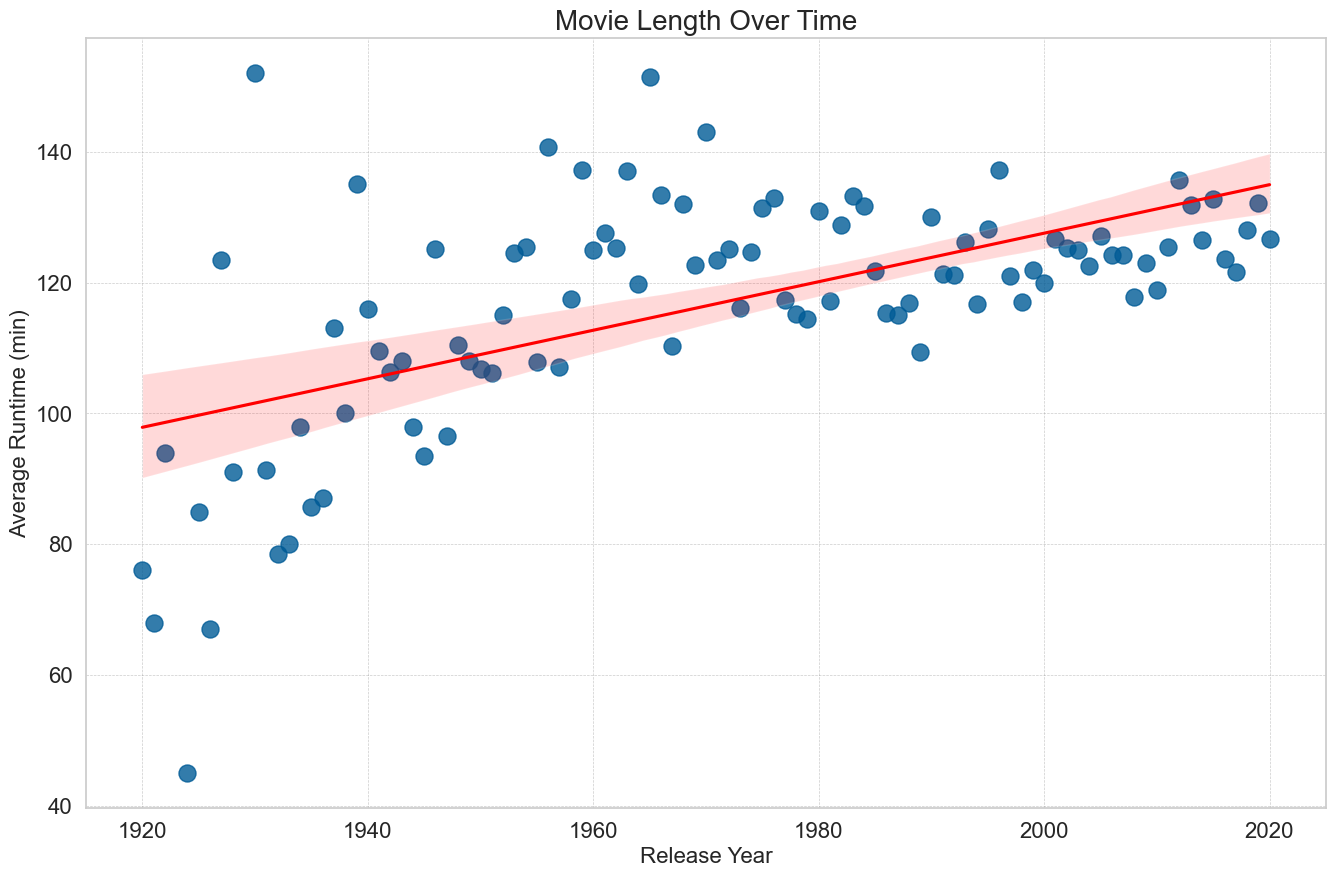

In [134]:
sns.set_style("whitegrid")

plt.figure(figsize=(16, 10))
sns.regplot(x='released_year', y='avg_runtime', data=length_by_years, 
            scatter_kws={"s": 150}, color='#005b96', line_kws={'color': 'red'})

plt.title('Movie Length Over Time', fontsize=20)
plt.xlabel('Release Year', fontsize=16)
plt.ylabel('Average Runtime (min)', fontsize=16)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Adding faint gridlines
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.4)

#plt.savefig('../4_graphs/4_length_over_time.png')

plt.show()


## 5. What genre generates the most revenue?

In [95]:
genre_by_revenue = pd.read_csv('../3_exported_data/4.genre_by_revenue.csv')

In [102]:
top_10_genre_by_revenue

,genre,total_revenue
0,"Action, Adventure, Sci-Fi","5,898,659,459"
1,"Animation, Adventure, Comedy","4,503,337,598"
2,"Action, Adventure, Drama","2,668,835,626"
3,"Action, Adventure, Fantasy","2,116,341,031"
4,Drama,"2,020,898,038"
5,"Animation, Action, Adventure","2,008,694,522"
6,"Drama, Romance","1,962,892,019"
7,"Action, Adventure, Comedy","1,920,413,944"
8,"Action, Crime, Drama","1,309,041,757"
9,"Biography, Drama, History","1,272,648,027"


In [101]:
pd.set_option("display.float_format", lambda x: '%.2f' % x)
pd.options.display.float_format = '{:,.0f}'.format
top_10_genre_by_revenue = genre_by_revenue.head(10)

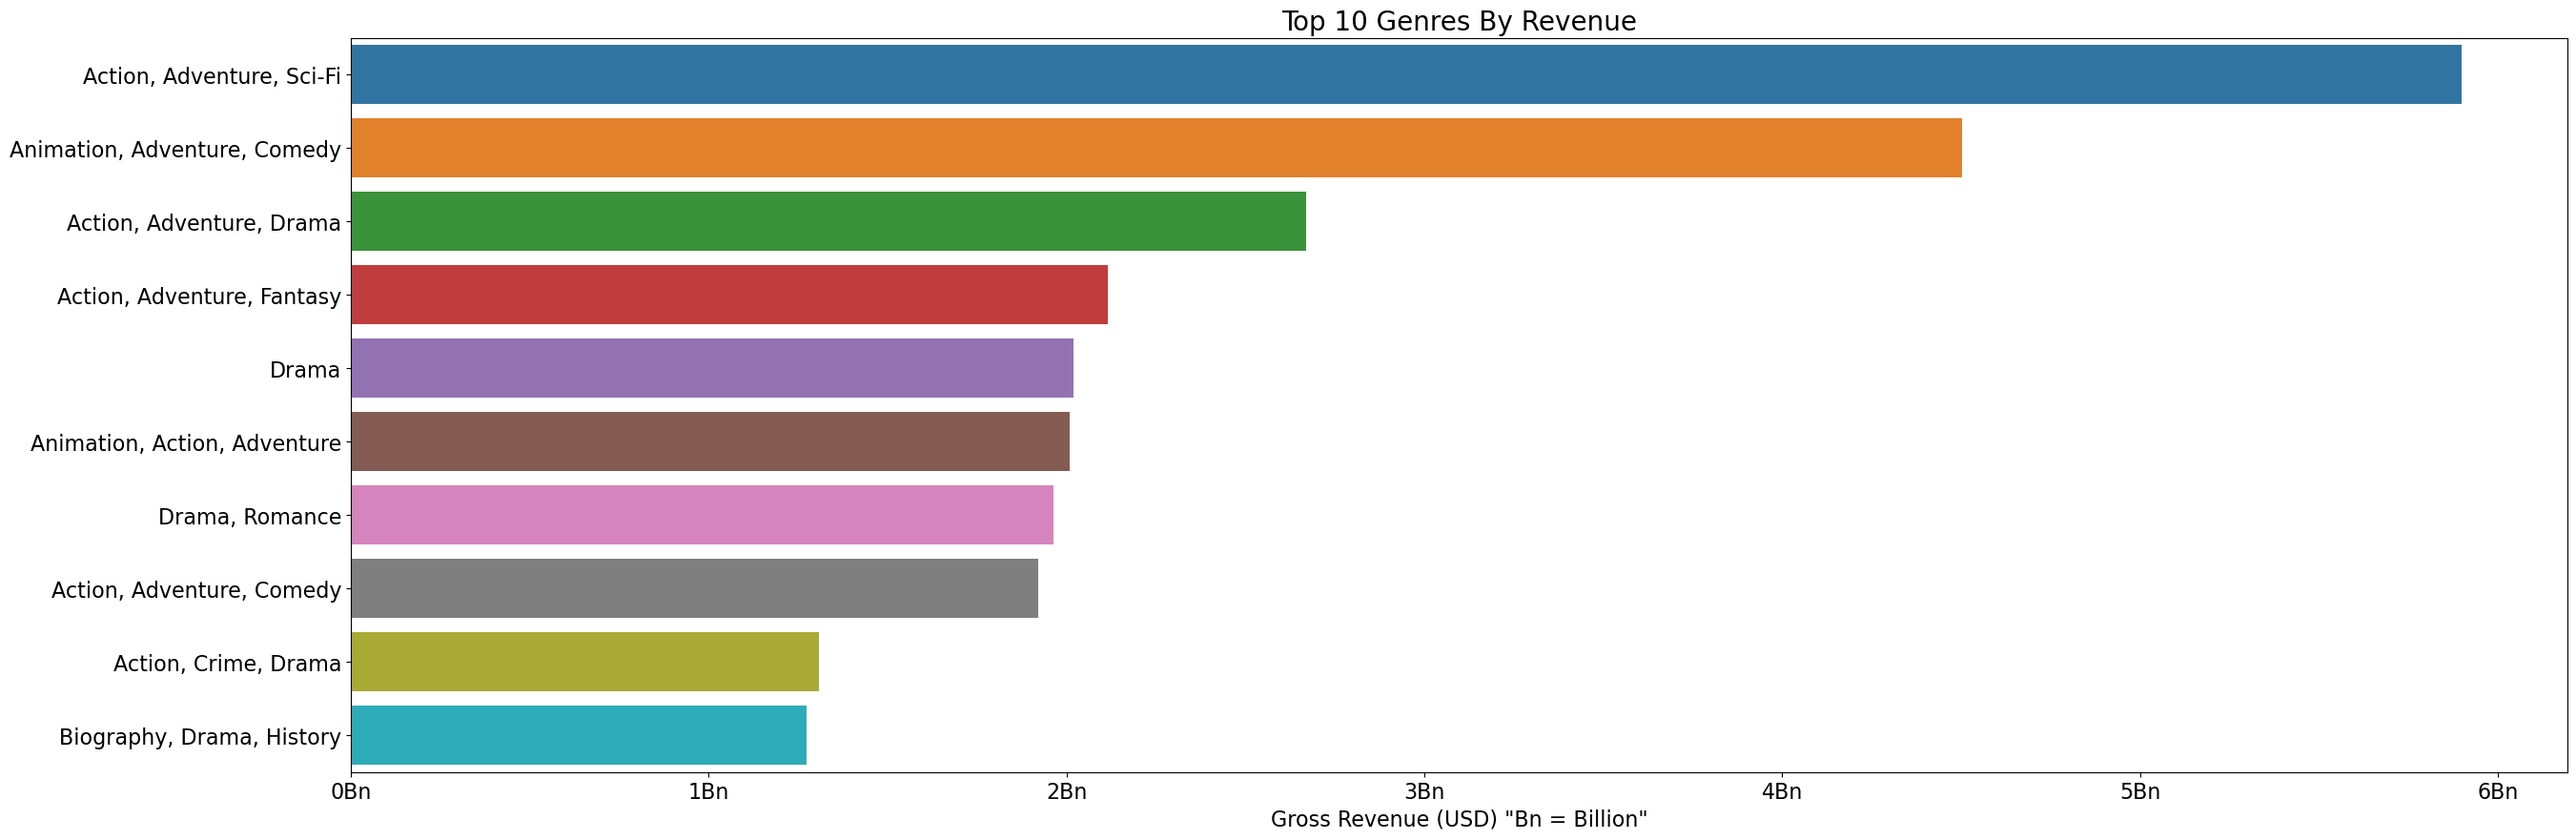

In [153]:
import matplotlib.ticker as mticker

sns.set_style("whitegrid")
plt.style.use("default")
plt.figure(figsize=(30,10))

sns.barplot(x='total_revenue', y='genre', data=top_10_genre_by_revenue)

plt.title('Top 10 Genres By Revenue', fontsize=20)
plt.xlabel('Gross Revenue (USD) "Bn = Billion"', fontsize=16)
plt.ylabel('', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Custom formatter to display x-axis values as '1Bn'...
formatter = mticker.FuncFormatter(lambda x, pos: f'{int(x/1e9)}Bn')
plt.gca().xaxis.set_major_formatter(formatter)

#plt.savefig('../4_graphs/5_top_genres_by_revenue.png')

plt.show()


## 6. What are the changes in genre popularity over the years? 

In [173]:
top_20_movies = df.sort_values(by='imdb_rating', ascending=False).head(20)

In [175]:
top_20_movies.head(1)

,series_title,released_year,certificate,runtime,genre,imdb_rating,meta_score,director,star1,star2,star3,star4,no_of_votes,gross,decade_interval
27,The Shawshank Redemption,"1,994",A,142,Drama,9,80,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469","(1990, 2000]"


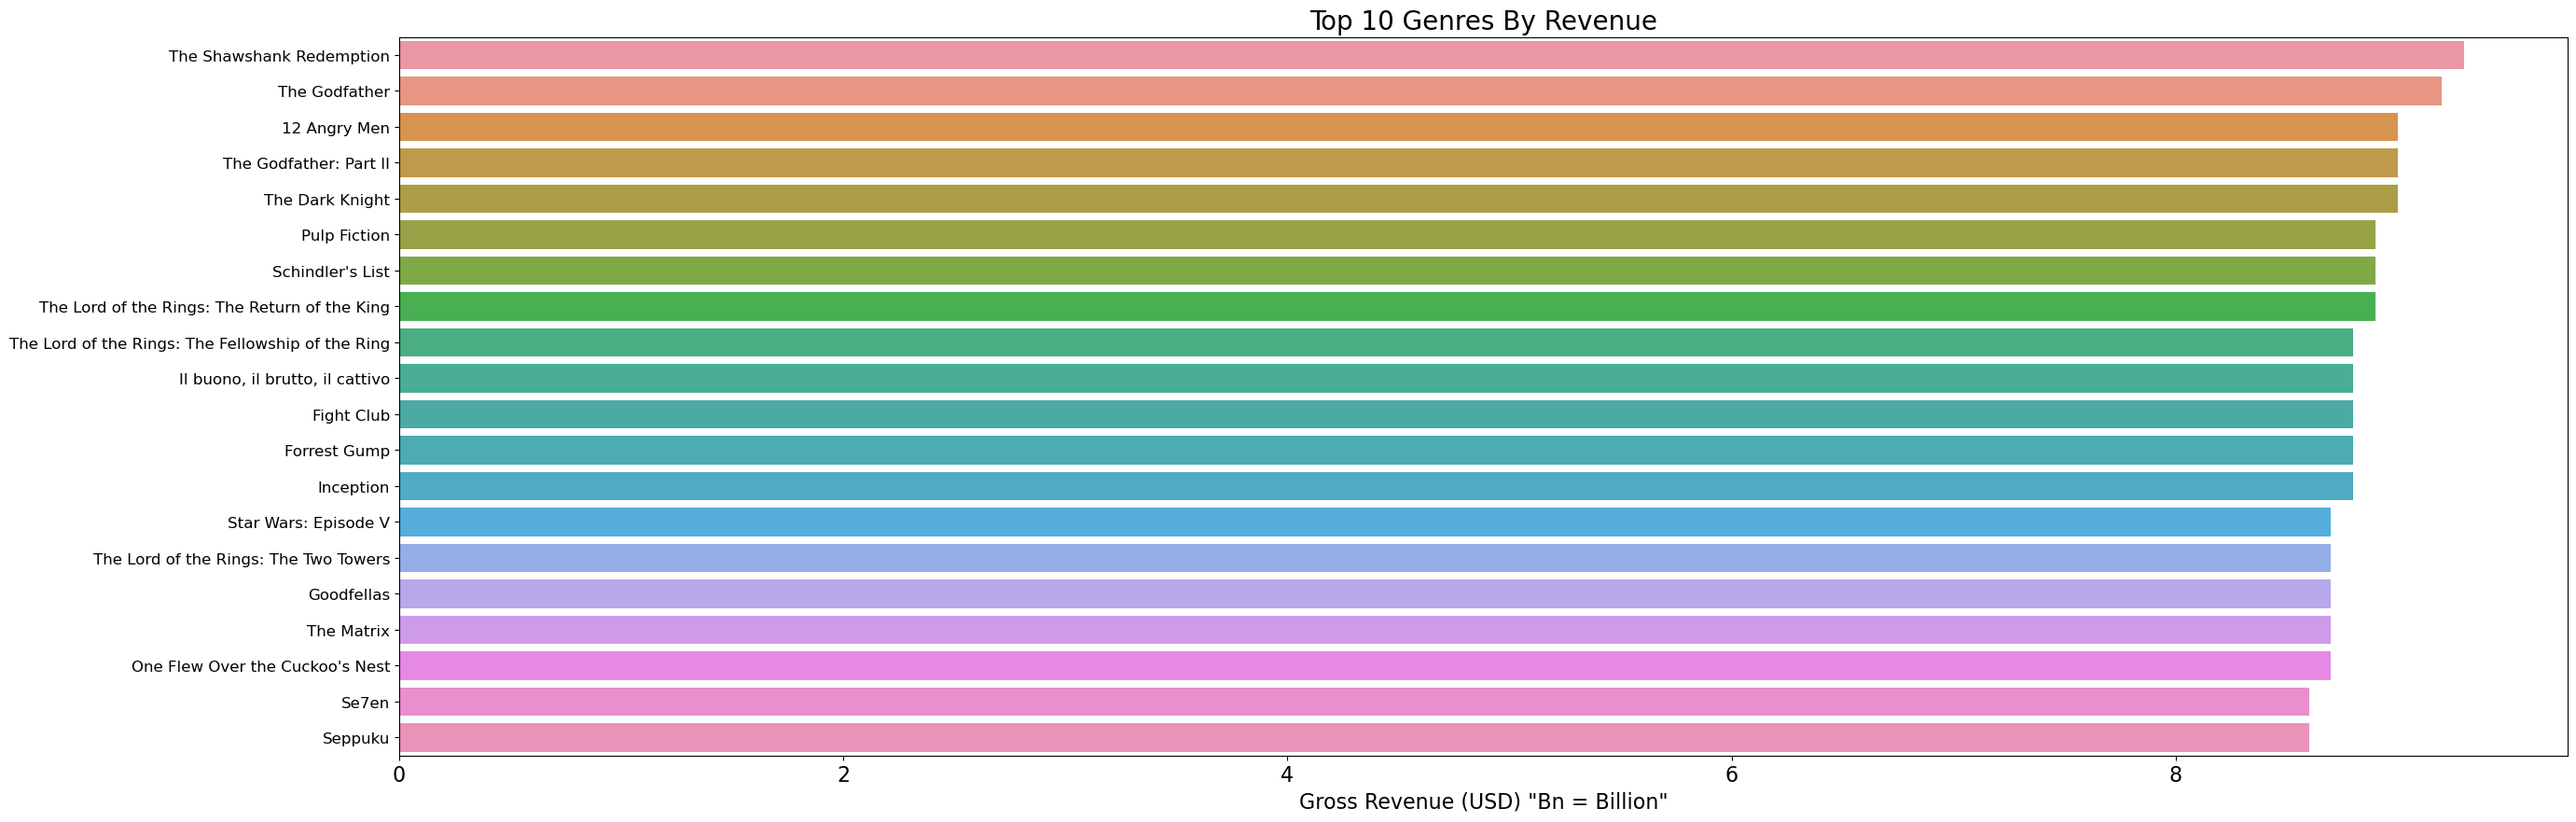

In [177]:
sns.set_style("whitegrid")
plt.style.use("default")
plt.figure(figsize=(30,10))

sns.barplot(x='imdb_rating', y='series_title', data=top_20_movies)

plt.title('Top 10 Genres By Revenue', fontsize=20)
plt.xlabel('Gross Revenue (USD) "Bn = Billion"', fontsize=16)
plt.ylabel('', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=12)

#plt.savefig('../4_graphs/5_top_genres_by_revenue.png')

plt.show()
